# Abdolazizsalimi980292626Ex6


## CIFAR-10 Dataset

The CIFAR-10 dataset consists of 60,000 32x32 colour images divided into 10 classes, with 6,000 images per class. The dataset is further divided into training and test sets, with 50,000 training images and 10,000 test images.




### Given an image, can we predict the correct class of this image?

The images are very small (32x32) and by visualizing them you will notice how difficult it is to distinguish them even for a human.

In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

### Training and Test Batches

The dataset is organized into five training batches and one test batch, each containing 10,000 images. The test batch comprises 1,000 randomly-selected images from each class, resulting in a total of 10,000 test images. 

In contrast, the training batches contain the remaining images and are organized in random order. It is important to note that some training batches may have an uneven distribution of images across classes, with more images from one class than another. However, collectively, the training batches contain exactly 5,000 images from each class.

This division allows researchers and practitioners to train machine learning models on the training set and evaluate their performance on the test set, providing a standardized benchmark for image classification tasks.



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

2023-06-07 18:05:27.478690: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 18:05:28.085847: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/mmd/miniconda3/envs/tf/lib/:/home/mmd/miniconda3/envs/tf/lib/
2023-06-07 18:05:28.087499: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/mmd/miniconda3/envs/tf/lib/:/home/mmd/miniconda3/envs/

In [3]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# batch_size = 1024  # The default batch size of keras.
# num_classes = 10  # Number of class for the dataset
# epochs = 50

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


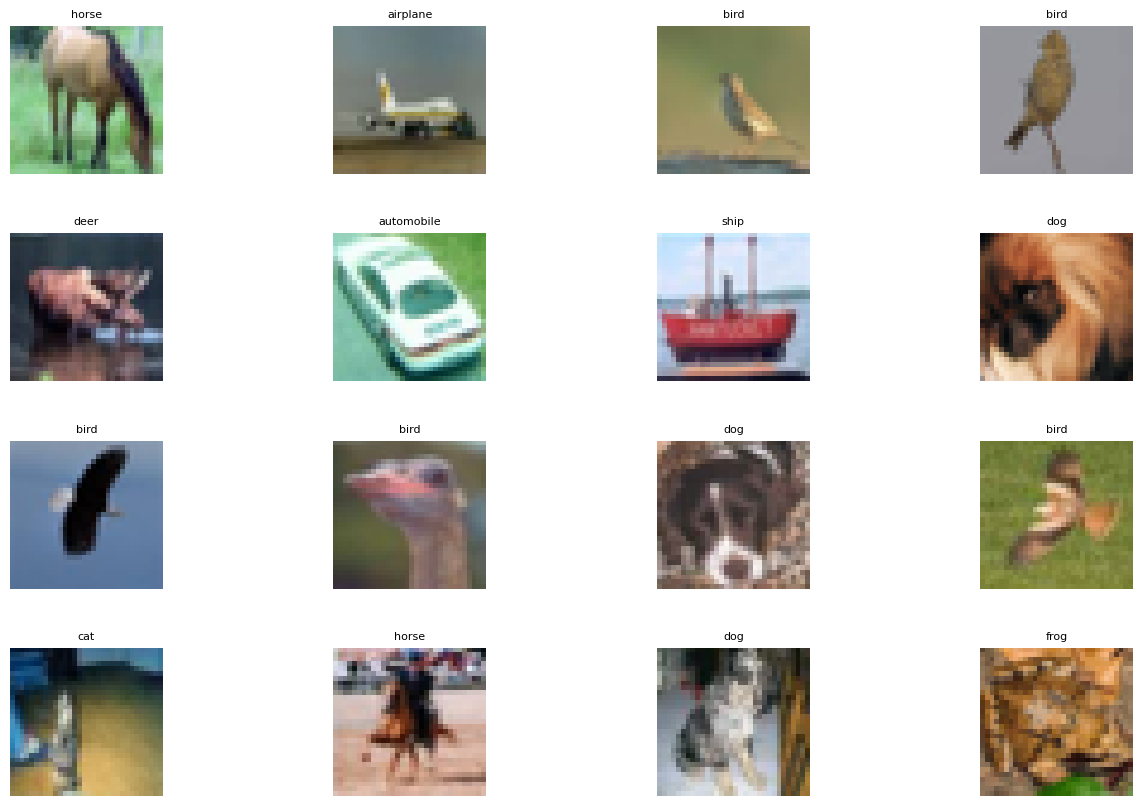

In [6]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 4
L_grid = 4



fig, axes = plt.subplots(L_grid, W_grid, figsize = (16 ,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (10).

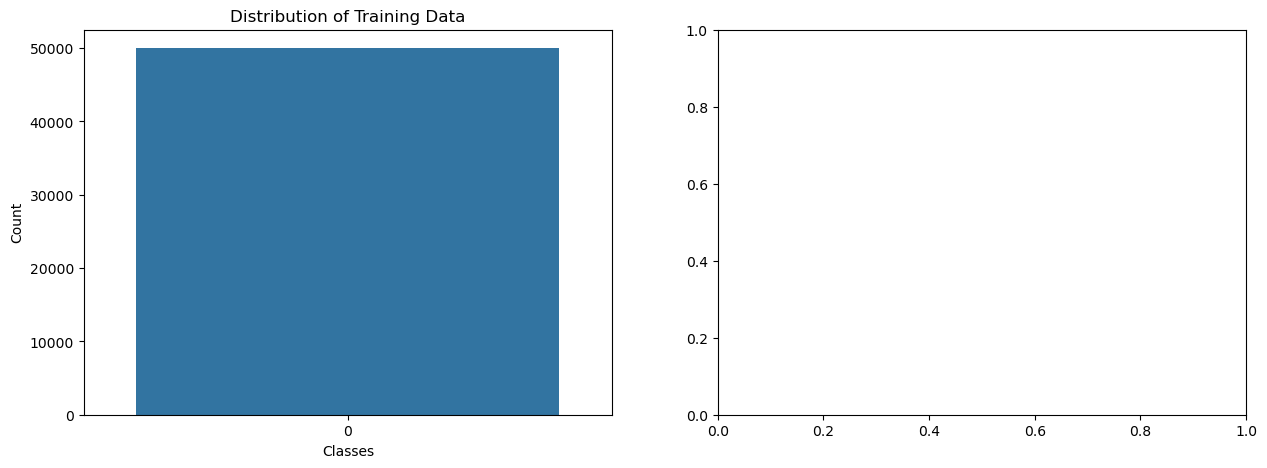

In [7]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of Training Data')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(classes_name)

# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing Data')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(classes_name)

plt.tight_layout()
plt.show()

In [14]:

# Transform target variable into one-hot-encoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

## Designing The  Neural Network:

In [8]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

2023-06-07 18:05:38.832383: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-07 18:05:38.866261: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-07 18:05:38.866455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-07 18:05:38.867410: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

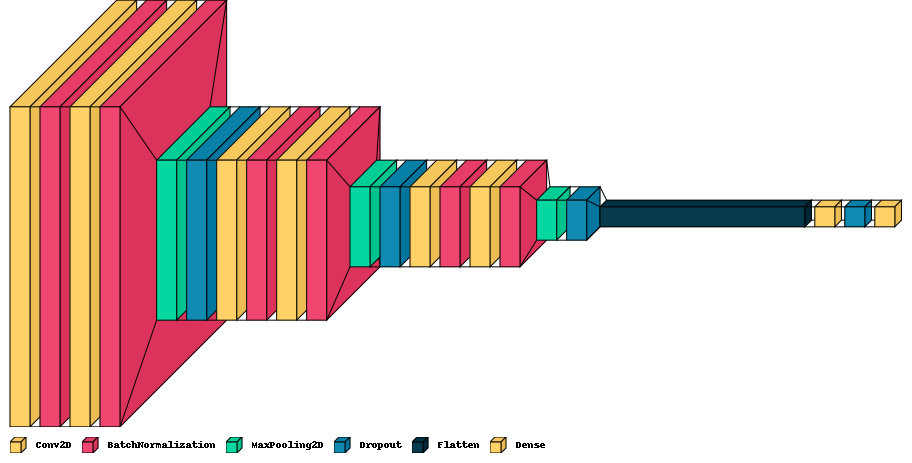

In [10]:
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

In [11]:


x_train = X_train.astype('float32')
x_test = X_test.astype('float32')

# Normalizing the input image
import numpy as np

# Compute mean and standard deviation of the training set
mean = np.mean(x_train, axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))


# Standardize the data
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std


# # Define the checkpoint callback
# checkpoint = ModelCheckpoint('best_CNN-model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_cat_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [16]:
model.fit(train_generator, 
              epochs=36,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_cat_test), 
             )

Epoch 1/36


2023-06-07 18:06:11.324502: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-06-07 18:06:13.056939: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-06-07 18:07:00.121443: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-07 18:07:00.201280: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x32e8d980 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-07 18:07:00.201330: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-06-07 18:07:00.225390: I tensorflow/compiler/mlir/tensorflow/utils/dump_m

1562/1562 [==============================] - 77s 15ms/step - loss: 1.6245 - accuracy: 0.4165 - precision: 0.6212 - recall: 0.2026 - val_loss: 1.3301 - val_accuracy: 0.5276 - val_precision: 0.6753 - val_recall: 0.3976
Epoch 2/36
1562/1562 [==============================] - 23s 15ms/step - loss: 1.2096 - accuracy: 0.5711 - precision: 0.7303 - recall: 0.4122 - val_loss: 0.9827 - val_accuracy: 0.6543 - val_precision: 0.7755 - val_recall: 0.5336
Epoch 3/36
1562/1562 [==============================] - 24s 15ms/step - loss: 1.0297 - accuracy: 0.6410 - precision: 0.7704 - recall: 0.5109 - val_loss: 0.8523 - val_accuracy: 0.7059 - val_precision: 0.8052 - val_recall: 0.6095
Epoch 4/36
1562/1562 [==============================] - 23s 15ms/step - loss: 0.9261 - accuracy: 0.6809 - precision: 0.7947 - recall: 0.5677 - val_loss: 0.7395 - val_accuracy: 0.7487 - val_precision: 0.8230 - val_recall: 0.6725
Epoch 5/36
1562/1562 [==============================] - 23s 15ms/step - loss: 0.8486 - accuracy: 0.

In [17]:
history = model.history.history
df=pd.DataFrame(history)

<Axes: >

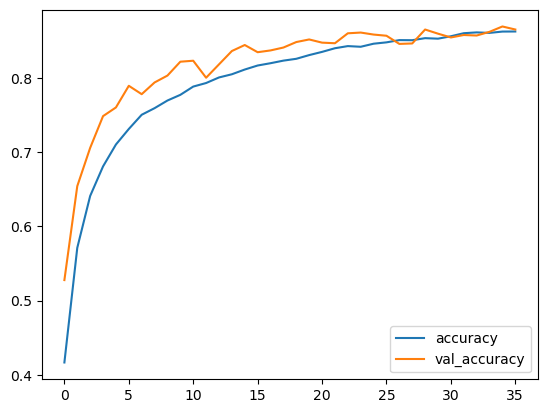

In [18]:
df[['accuracy','val_accuracy']].plot()

<Axes: >

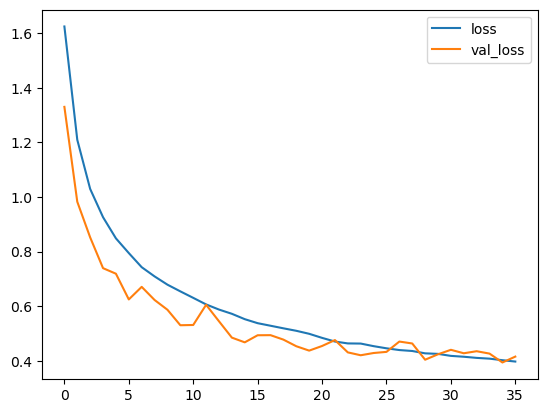

In [19]:
df[['loss','val_loss']].plot()

In [20]:
# Score trained model.
model.evaluate(x_test, y_cat_test)


313/313 [==============================] - 3s 8ms/step - loss: 0.4157 - accuracy: 0.8655 - precision: 0.8916 - recall: 0.8481


[0.41568461060523987,
 0.8654999732971191,
 0.8916106224060059,
 0.8481000065803528]

In [21]:
predictions=np.argmax(model.predict(x_test),1)

313/313 [==============================] - 1s 3ms/step


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1000
           1       0.97      0.91      0.94      1000
           2       0.91      0.71      0.80      1000
           3       0.79      0.71      0.75      1000
           4       0.84      0.87      0.86      1000
           5       0.78      0.82      0.80      1000
           6       0.79      0.96      0.86      1000
           7       0.93      0.91      0.92      1000
           8       0.92      0.93      0.93      1000
           9       0.87      0.96      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000



In [23]:
y_pred=model.predict(x_test)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[2.2254018e-07, 5.4435063e-08, 2.1816002e-06, ..., 1.1813261e-07,
        1.7770162e-08, 4.7317985e-09],
       [1.4943829e-08, 8.1955013e-06, 1.4719090e-14, ..., 1.8390627e-15,
        9.9999166e-01, 6.4316907e-08],
       [1.3387689e-03, 1.5493689e-02, 6.1663167e-07, ..., 9.1426962e-08,
        9.8307043e-01, 8.5630512e-05],
       ...,
       [6.5831380e-09, 2.6248856e-10, 1.9457308e-05, ..., 8.6086557e-06,
        3.1194872e-08, 7.6006952e-09],
       [6.7136330e-06, 9.9982733e-01, 2.5887482e-08, ..., 9.0781174e-11,
        8.0457248e-06, 1.5671006e-04],
       [1.0534303e-13, 4.4372110e-18, 4.9473609e-13, ..., 9.9999917e-01,
        5.6078923e-20, 3.2791446e-16]], dtype=float32)

In [24]:
y_classes=[np.argmax(element) for element in y_pred]

In [25]:
def predict_which_category(x, y, index):
    print("predict to be", classes_name[y_classes[index]])
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predict to be Ship


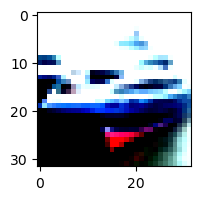

In [26]:
predict_which_category(x_test,y_test,1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predict to be Frog


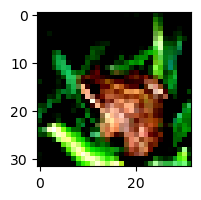

In [38]:
predict_which_category(x_test,y_test,4)

In [39]:
model.save('best-CNN-model.h5')